In [107]:
import pandas as pd 
import missingno as msno


poroperm = pd.read_csv('poro_perm_data.csv')

<AxesSubplot:>

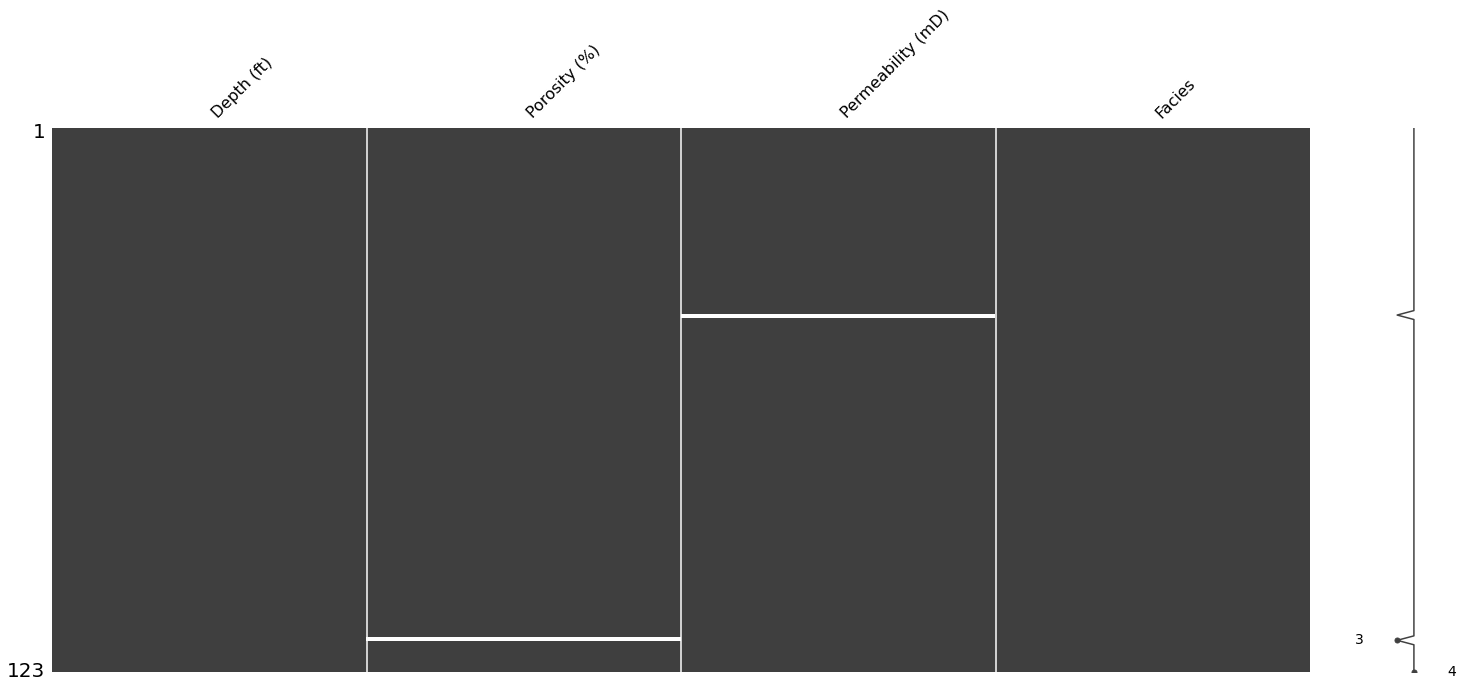

In [108]:
msno.matrix(poroperm)

In [109]:
poroperm.isnull().sum()

Depth (ft)           0
Porosity (%)         1
Permeability (mD)    1
Facies               0
dtype: int64

In [110]:
pp1 = poroperm.copy()
pp1.dropna(axis = 0, inplace = True )
pp1.isnull().sum()

Depth (ft)           0
Porosity (%)         0
Permeability (mD)    0
Facies               0
dtype: int64

<AxesSubplot:>

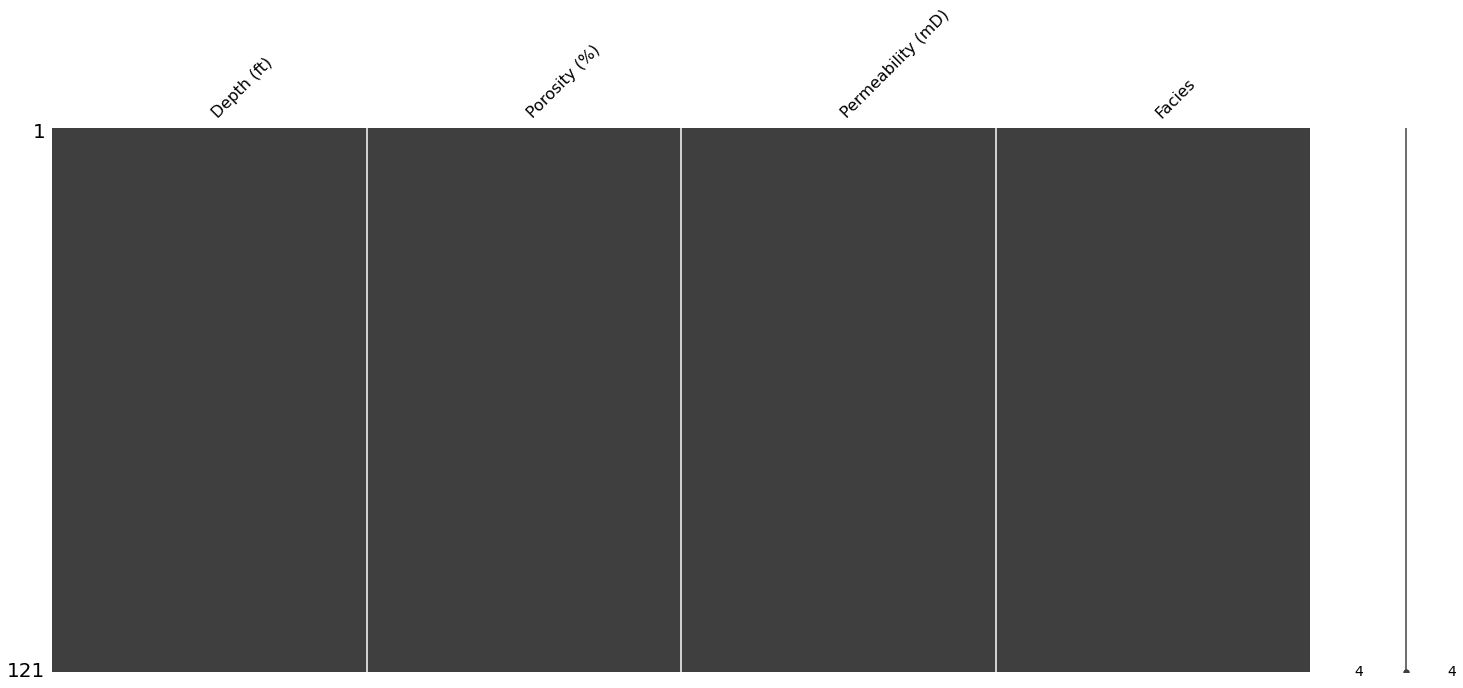

In [111]:
msno.matrix(pp1)

In [112]:
pp1.head()

Depth (ft)  Porosity (%)  Permeability (mD)            Facies
0      1863.5     14.427556          31.053211       'overbanks'
1      2515.0     16.733522          12.412608         'channel'
2      1608.0     20.211138          95.735554  'crevasse splay'
3       201.0      0.399182          21.324455         'channel'
4      2580.0     14.533879          53.694037  'crevasse splay'

In [113]:
# Removing the inverted commas in the 'Facies' column
pp1['Facies'] = pp1['Facies'].map(lambda x: x.rstrip("'"))
pp1['Facies'] = pp1['Facies'].map(lambda x: x.lstrip("'"))
pp1.head()

Depth (ft)  Porosity (%)  Permeability (mD)          Facies
0      1863.5     14.427556          31.053211       overbanks
1      2515.0     16.733522          12.412608         channel
2      1608.0     20.211138          95.735554  crevasse splay
3       201.0      0.399182          21.324455         channel
4      2580.0     14.533879          53.694037  crevasse splay

In [114]:
# str.title() makes the first letter capital 
pp1['Facies'] = pp1['Facies'].str.title()
pp1.loc[:,"Facies"].unique()
pp1.head()


Depth (ft)  Porosity (%)  Permeability (mD)          Facies
0      1863.5     14.427556          31.053211       Overbanks
1      2515.0     16.733522          12.412608         Channel
2      1608.0     20.211138          95.735554  Crevasse Splay
3       201.0      0.399182          21.324455         Channel
4      2580.0     14.533879          53.694037  Crevasse Splay

In [115]:
pp1.drop(pp1[pp1['Porosity (%)'] < 0].index, inplace = True)
pp1.describe()

Depth (ft)  Porosity (%)  Permeability (mD)
count   119.000000    119.000000         119.000000
mean   1862.596639     14.095505          39.679606
std     931.359880      6.704431          27.854143
min     201.000000      0.080567         -34.813937
25%    1185.750000     10.343603          22.643846
50%    2482.500000     12.882626          33.029019
75%    2550.500000     18.181287          48.896760
max    2922.000000     28.163516         113.269795

In [116]:
pp1['Permeability (mD)']=pp1['Permeability (mD)'].astype('str')

pp1['Permeability (mD)']=pp1['Permeability (mD)'].str.replace('-','')

pp1['Permeability (mD)']=pp1['Permeability (mD)'].astype('float')

pp1.describe()

Depth (ft)  Porosity (%)  Permeability (mD)
count   119.000000    119.000000         119.000000
mean   1862.596639     14.095505          40.264714
std     931.359880      6.704431          26.994088
min     201.000000      0.080567           0.000000
25%    1185.750000     10.343603          23.963237
50%    2482.500000     12.882626          33.029019
75%    2550.500000     18.181287          48.896760
max    2922.000000     28.163516         113.269795

In [117]:
pp1.drop(pp1[pp1['Permeability (mD)'] <= 0].index, inplace = True)
pp1.describe()

Depth (ft)  Porosity (%)  Permeability (mD)
count   116.000000    116.000000         116.000000
mean   1860.784483     14.328567          41.306043
std     934.162243      6.626390          26.538701
min     201.000000      0.080567           2.296592
25%    1232.375000     10.760361          25.205635
50%    2487.500000     13.361607          33.968184
75%    2553.750000     18.263966          50.295919
max    2922.000000     28.163516         113.269795

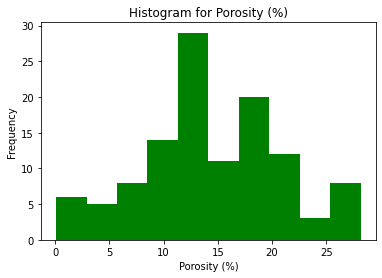

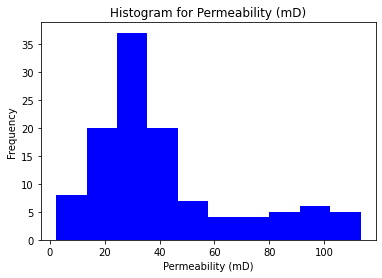

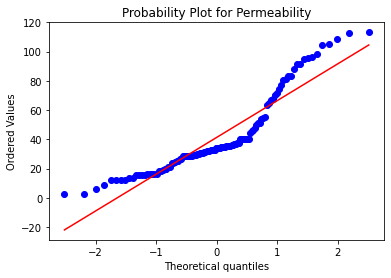

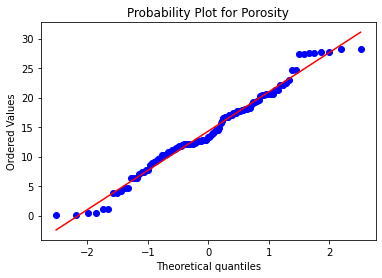

In [118]:
import scipy.stats as stats

plt.hist(pp1['Porosity (%)'],10,color='green')
plt.ylabel('Frequency')
plt.xlabel('Porosity (%)')
plt.title('Histogram for Porosity (%)')
plt.show()

plt.hist(pp1['Permeability (mD)'],10,color='blue')
plt.ylabel('Frequency')
plt.xlabel('Permeability (mD)')
plt.title('Histogram for Permeability (mD)')
plt.show()

stats.probplot(pp1['Permeability (mD)'], dist="norm", plot=plt)
plt.title('Probability Plot for Permeability')
plt.show()

stats.probplot(pp1['Porosity (%)'], dist="norm", plot=plt)
plt.title('Probability Plot for Porosity')
plt.show()


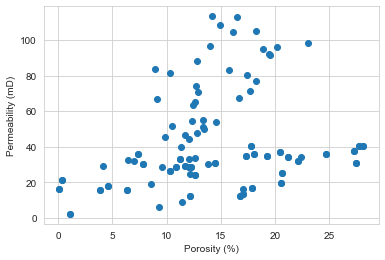

R square value: 0.06050972598439486


In [188]:
import numpy as np
X = pp1['Porosity (%)']
Y = pp1['Permeability (mD)']
plt.scatter(X,Y)
plt.xlabel('Porosity (%)')
plt.ylabel('Permeability (mD)')
plt.show()

X,Y = np.array(X), np.array(Y)
X = X.reshape(-1,1)

model = LinearRegression()
model.fit(X,Y)
r_sq = model.score(X, Y)
print('R square value:', r_sq)

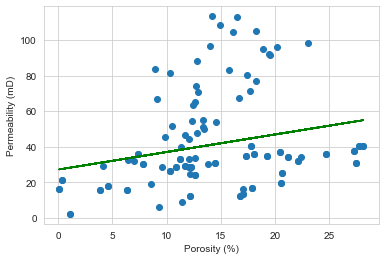

R square value: 0.06050972598439486


In [189]:
model = LinearRegression()
model.fit(X, Y)
r_sq = model.score(X, Y)
y_pred = model.predict(X)

plt.scatter(X,Y)
plt.plot(X,y_pred, color="g")

plt.xlabel('Porosity (%)')
plt.ylabel('Permeability (mD)')
plt.show()
print('R square value:', r_sq)

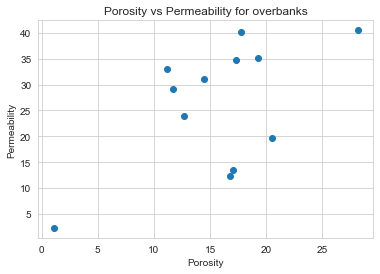

R value is: 0.33385760229464456


In [198]:
model = LinearRegression()
X = pp1.loc[pp1['Facies'] == 'Overbanks','Porosity (%)']
Y = pp1.loc[pp1['Facies'] == 'Overbanks','Permeability (mD)']
plt.scatter(X,Y)
plt.xlabel('Porosity')
plt.ylabel('Permeability')
plt.title('Porosity vs Permeability for overbanks')
plt.show()

X,Y = np.array(X),np.array(Y)
X = X.reshape(-1,1)
model.fit(X, Y)
r_sq = model.score(X, Y)
print('R value is:',r_sq)


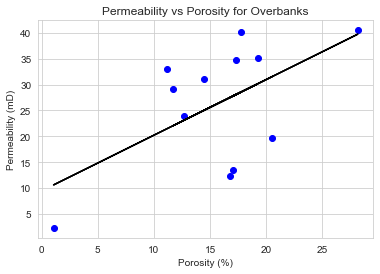

R^2 Value: 0.33385760229464456


In [203]:
model = LinearRegression()
X = pp1.loc[pp1['Facies'] == 'Overbanks', 'Porosity (%)']
Y = pp1.loc[pp1['Facies'] == 'Overbanks', 'Permeability (mD)']
 
X,Y = np.array(X),np.array(Y)
X = X.reshape(-1,1)
model = LinearRegression()
model.fit(X, Y)
r_sq = model.score(X, Y)
y_pred = model.predict(X)
 
plt.scatter(X,Y, color='blue')
plt.plot(X,y_pred, color="k")
plt.title('Permeability vs Porosity for Overbanks')
plt.xlabel('Porosity (%)')
plt.ylabel('Permeability (mD)')
plt.show()
print('R^2 Value:', r_sq)

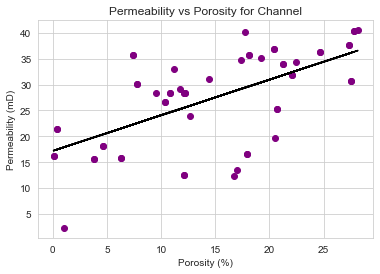

R^2 Value: 0.3876404216299154


In [204]:
model = LinearRegression()
X = pp1.loc[pp1['Facies'] == 'Channel', 'Porosity (%)']
Y = pp1.loc[pp1['Facies'] == 'Channel', 'Permeability (mD)']
 
X,Y = np.array(X),np.array(Y)
X = X.reshape(-1,1)
model = LinearRegression()
model.fit(X, Y)
r_sq = model.score(X, Y)
y_pred = model.predict(X)
 
plt.scatter(X,Y, color='purple')
plt.plot(X,y_pred, color="k")
plt.title('Permeability vs Porosity for Channel')
plt.xlabel('Porosity (%)')
plt.ylabel('Permeability (mD)')
plt.show()
print('R^2 Value:', r_sq)

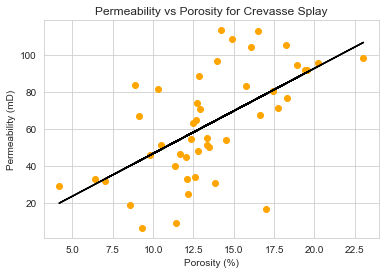

R^2 Value: 0.36938021004190025


In [205]:
model = LinearRegression()
X = pp1.loc[pp1['Facies'] == 'Crevasse Splay', 'Porosity (%)']
Y = pp1.loc[pp1['Facies'] == 'Crevasse Splay', 'Permeability (mD)']
 
X,Y = np.array(X),np.array(Y)
X = X.reshape(-1,1)
model = LinearRegression()
model.fit(X, Y)
r_sq = model.score(X, Y)
y_pred = model.predict(X)
 
plt.scatter(X,Y, color='orange')
plt.plot(X,y_pred, color="k")
plt.title('Permeability vs Porosity for Crevasse Splay')
plt.xlabel('Porosity (%)')
plt.ylabel('Permeability (mD)')
plt.show()
print('R^2 Value:', r_sq)

Text(0, 0.5, 'Permeability (mD)')

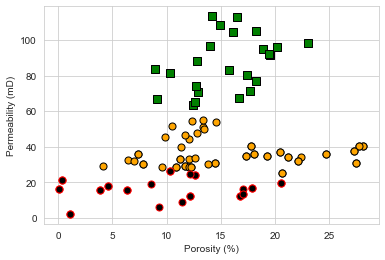

In [206]:
x = pp1['Porosity (%)']
y = pp1['Permeability (mD)']
x,y = np.array(x), np.array(y)
x = x.reshape(-1,1)
y = y.reshape(-1,1)
xy = np.hstack((x,y))
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300,
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(xy)
# plot clusters
plt.scatter(
    xy[y_km == 0, 0], xy[y_km == 0, 1],
    s=50, c='green',
    marker='s', edgecolor='black',
    label='cluster 1'
)
 
plt.scatter(
    xy[y_km == 1, 0], xy[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)
 
plt.scatter(
    xy[y_km == 2, 0], xy[y_km == 2, 1],
    s=50, c='black',
    marker='o', edgecolor='red',
    label='cluster 3'
)

plt.xlabel('Porosity (%)')
plt.ylabel('Permeability (mD)')


R value is: 0.1521525602924857


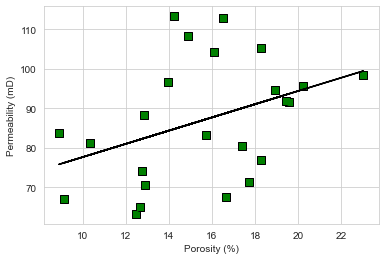

In [207]:
plt.scatter(
    xy[y_km == 0, 0], xy[y_km == 0, 1],
    s=50, c='green',
    marker='s', edgecolor='black',
    label='cluster 1'
)
x=xy[y_km == 0, 0]
y=xy[y_km == 0, 1]
x,y = np.array(x),np.array(y)
x = x.reshape(-1,1)
model = LinearRegression()
model.fit(x, y)
r_sq = model.score(x, y)
y_pred = model.predict(x)

plt.scatter(x,y, color='green')
plt.plot(x,y_pred, color="k")

plt.xlabel('Porosity (%)')
plt.ylabel('Permeability (mD)')
print('R value is:',r_sq)


R value is: 0.0008538395122719145


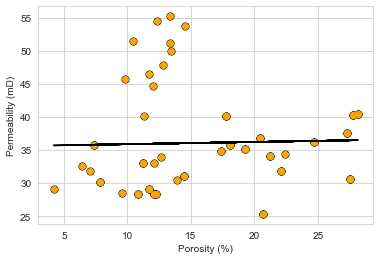

In [196]:
plt.scatter(
    xy[y_km == 1, 0], xy[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)


x=xy[y_km == 1, 0]
y=xy[y_km == 1, 1]
x,y = np.array(x),np.array(y)
x = x.reshape(-1,1)
model = LinearRegression()
model.fit(x, y)
r_sq = model.score(x, y)
y_pred = model.predict(x)

plt.scatter(x,y, color='orange')
plt.plot(x,y_pred, color="k")

plt.xlabel('Porosity (%)')
plt.ylabel('Permeability (mD)')
print('R value is:',r_sq)




R value is: 0.020337290687784226


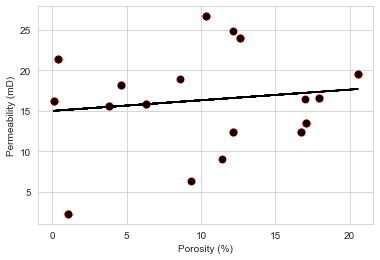

In [197]:
plt.scatter(
    xy[y_km == 2, 0], xy[y_km == 2, 1],
    s=50, c='red',
    marker='o', edgecolor='red',
    label='cluster 3'
)

x=xy[y_km == 2, 0]
y=xy[y_km == 2, 1]
x,y = np.array(x),np.array(y)
x = x.reshape(-1,1)
model = LinearRegression()
model.fit(x, y)
r_sq = model.score(x, y)
y_pred = model.predict(x)

plt.scatter(x,y, color='black')
plt.plot(x,y_pred, color="k")

plt.xlabel('Porosity (%)')
plt.ylabel('Permeability (mD)')
print('R value is:',r_sq)


In [193]:
X = pp1.drop('Facies',axis=1)
y = pp1['Facies']

from sklearn.model_selection import train_test_split

#Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.5)

#Data Preprocessing
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit only to the training data
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#Training the model
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(4,4,4),max_iter=1000)

mlp.fit(X_train,y_train)

predictions = mlp.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test,predictions))

                precision    recall  f1-score   support

       Channel       0.74      0.83      0.78        30
Crevasse Splay       0.75      0.86      0.80        21
     Overbanks       0.00      0.00      0.00         7

      accuracy                           0.74        58
     macro avg       0.50      0.56      0.53        58
  weighted avg       0.65      0.74      0.69        58



/Users/mohammadalassi/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mohammadalassi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mohammadalassi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mohammadalassi/opt/anaconda3/lib/python3.9/site-packages/sklearn/me

# Second File

In [14]:
import lasio
import numpy as np

In [15]:
las = lasio.read('1051661161.las')

In [16]:
# convert to a data frame
df = las.df()  

In [17]:
df.head()

AVTX  BVTX     CILD     CNDL     CNLS    CNPOR     CNSS       GR  \
DEPT                                                                      
195.0   0.0   0.0  50.1033  26.8228  34.0239  34.0239  36.6129  67.9772   
195.5   0.0   0.0  50.0399  22.3549  30.5510  30.5510  33.0634  66.6325   
196.0   0.0   0.0  49.9584  20.3087  29.0076  29.0076  31.5179  70.3524   
196.5   0.0   0.0  49.7387  23.4421  31.4152  31.4152  33.9631  72.3127   
197.0   0.0   0.0  49.3747  28.0807  35.0576  35.0576  37.5494  66.9943   

        LSPD      LTEN  ...    MCAL      MI      MN  ITT        DT     SPOR  \
DEPT                    ...                                                   
195.0 -59.66  609.5474  ...  5.4417 -0.0402 -1.4576  0.0  187.5248  98.9567   
195.5 -59.66  609.0641  ...  5.4386 -0.0450 -1.4576  0.0  187.4460  98.9010   
196.0 -59.41  605.4785  ...  5.4420 -0.0509 -1.4580  0.0  187.4191  98.8820   
196.5 -59.41  602.3272  ...  5.4435 -0.0533 -1.4597  0.0  187.5659  98.9858   
197.0 -59.29  604.2205  ...  5.4349 -0.0536 -1.4620  1.0  187.9458  99.2545   

         DCAL    RHOB    RHOC     DPOR  
DEPT                                    
195.0  4.4815  2.3568  0.0004  20.6567  
195.5  4.4861  2.3609  0.0041  20.4146  
196.0  4.4849  2.3600  0.0053  20.4690  
196.5  4.4806  2.3548  0.0043  20.7699  
197.0  4.4776  2.3481  0.0026  21.1618  

[5 rows x 25 columns]

In [18]:
df.describe()

AVTX         BVTX         CILD         CNDL         CNLS  \
count  5541.000000  5541.000000  5540.000000  5466.000000  5466.000000   
mean      0.012272     0.021115   139.910654    18.085643    25.871001   
std       0.119540     0.155831    92.053635     9.482882    11.012485   
min       0.000000     0.000000     0.000000   -10.381000   -27.299300   
25%       0.000000     0.000000    78.501300    11.179700    20.364025   
50%       0.000000     0.000000   118.398800    19.443600    28.286950   
75%       0.000000     0.000000   183.443200    24.192075    32.062125   
max       2.000000     2.000000   674.211400   200.707200   400.581900   

             CNPOR         CNSS             GR         LSPD         LTEN  ...  \
count  5466.000000  5467.000000    5452.000000  5541.000000  5541.000000  ...   
mean     25.780431    28.638905     226.288636   -68.668264  1102.225995  ...   
std       9.751341     8.460903    3578.021831    21.135791   239.228427  ...   
min     -41.596500   -11.857700     -58.279600   -92.380000   602.327200  ...   
25%      20.364025    23.832050      67.104700   -85.370000   898.337000  ...   
50%      28.280950    30.826900     101.855900   -77.990000  1120.542400  ...   
75%      32.052275    34.632600     124.645475   -37.020000  1322.002300  ...   
max     250.748200    51.426600  100000.000000    -1.720000  1520.791500  ...   

              MCAL           MI           MN          ITT           DT  \
count  5509.000000  5512.000000  5512.000000  5541.000000  5541.000000   
mean      8.144689    12.399068    11.671000     0.078506    95.111759   
std       1.625604    16.065711    17.501263     0.292151    23.985427   
min     -65.767800    -1.594000    -1.891200     0.000000    -2.492400   
25%       8.010900     4.126400     2.798975     0.000000    80.095700   
50%       8.133300     7.358100     5.537800     0.000000    96.999000   
75%       8.362700    11.108925    10.935250     0.000000   108.288300   
max      12.344800   142.340500   164.806500     2.000000   238.234000   

              SPOR         DCAL           RHOB         RHOC         DPOR  
count  5540.000000  5494.000000    5497.000000  5498.000000  5498.000000  
mean     33.603773     8.274458      38.845337     0.070521    14.762778  
std      16.963060     3.818390    1907.225020     0.077172     9.044476  
min     -35.426000     4.473900      -2.556100    -3.184200   -82.064400  
25%      22.989725     7.998800       2.385200     0.040800     8.676750  
50%      34.937400     8.123650       2.464800     0.059700    14.353900  
75%      42.920950     8.350400       2.562000     0.088400    18.975050  
max     134.819000   173.585200  100000.000000     0.270500   158.479500  

[8 rows x 25 columns]

<AxesSubplot:>

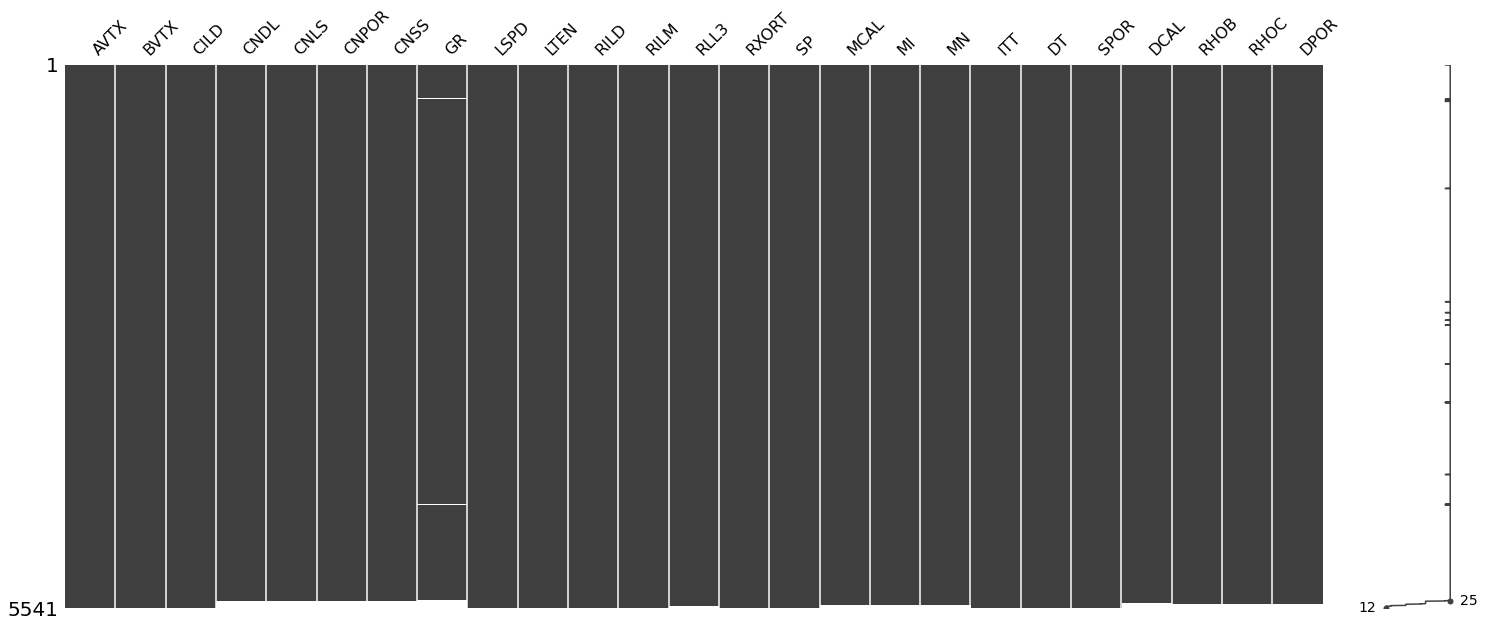

In [19]:
msno.matrix(df)

In [20]:
df.isnull().sum()

AVTX      0
BVTX      0
CILD      1
CNDL     75
CNLS     75
CNPOR    75
CNSS     74
GR       89
LSPD      0
LTEN      0
RILD      0
RILM      4
RLL3     22
RXORT     0
SP        0
MCAL     32
MI       29
MN       29
ITT       0
DT        0
SPOR      1
DCAL     47
RHOB     44
RHOC     43
DPOR     43
dtype: int64

In [21]:
df1 = df.copy()
df1['CILD'] = df1['CILD'].replace(np.nan, df1['CILD'].mean(), regex = True)
df1['CNDL'] = df1['CNDL'].replace(np.nan, df1['CNDL'].mean(), regex = True)
df1['CNLS'] = df1['CNLS'].replace(np.nan, df1['CNLS'].mean(), regex = True)
df1['CNPOR'] = df1['CNPOR'].replace(np.nan, df1['CNPOR'].mean(), regex = True)
df1['CNSS'] = df1['CNSS'].replace(np.nan, df1['CNSS'].mean(), regex = True)
df1['GR'] = df1['GR'].replace(np.nan, df1['GR'].mean(), regex = True)
df1['RILM'] = df1['RILM'].replace(np.nan, df1['RILM'].mean(), regex = True)
df1['RLL3'] = df1['RLL3'].replace(np.nan, df1['RLL3'].mean(), regex = True)
df1['MCAL'] = df1['MCAL'].replace(np.nan, df1['MCAL'].mean(), regex = True)
df1['MI'] = df1['MI'].replace(np.nan, df1['MI'].mean(), regex = True)
df1['MN'] = df1['MN'].replace(np.nan, df1['MN'].mean(), regex = True)
df1['SPOR'] = df1['SPOR'].replace(np.nan, df1['SPOR'].mean(), regex = True)
df1['DCAL'] = df1['DCAL'].replace(np.nan, df1['DCAL'].mean(), regex = True)
df1['RHOB'] = df1['RHOB'].replace(np.nan, df1['RHOB'].mean(), regex = True)
df1['RHOC'] = df1['RHOC'].replace(np.nan, df1['RHOC'].mean(), regex = True)
df1['DPOR'] = df1['DPOR'].replace(np.nan, df1['DPOR'].mean(), regex = True)

In [22]:
df1.isnull().sum()

AVTX     0
BVTX     0
CILD     0
CNDL     0
CNLS     0
CNPOR    0
CNSS     0
GR       0
LSPD     0
LTEN     0
RILD     0
RILM     0
RLL3     0
RXORT    0
SP       0
MCAL     0
MI       0
MN       0
ITT      0
DT       0
SPOR     0
DCAL     0
RHOB     0
RHOC     0
DPOR     0
dtype: int64

<AxesSubplot:>

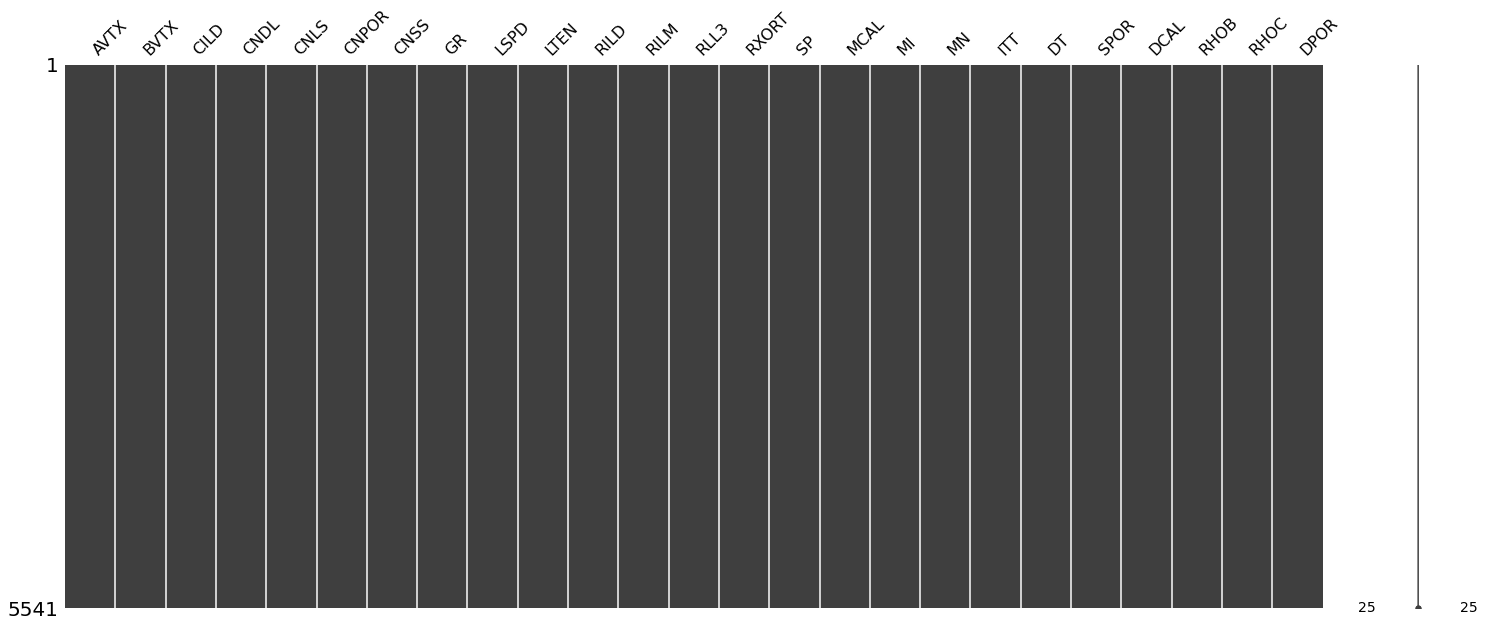

In [23]:
msno.matrix(df1)

In [24]:
df1.describe()

AVTX         BVTX         CILD         CNDL         CNLS  \
count  5541.000000  5541.000000  5541.000000  5541.000000  5541.000000   
mean      0.012272     0.021115   139.910654    18.085643    25.871001   
std       0.119540     0.155831    92.045326     9.418474    10.937688   
min       0.000000     0.000000     0.000000   -10.381000   -27.299300   
25%       0.000000     0.000000    78.504700    11.360200    20.599900   
50%       0.000000     0.000000   118.399300    19.313100    28.182200   
75%       0.000000     0.000000   183.430200    24.087600    31.991300   
max       2.000000     2.000000   674.211400   200.707200   400.581900   

             CNPOR         CNSS             GR         LSPD         LTEN  ...  \
count  5541.000000  5541.000000    5541.000000  5541.000000  5541.000000  ...   
mean     25.780431    28.638905     226.288636   -68.668264  1102.225995  ...   
std       9.685110     8.404205    3549.165037    21.135791   239.228427  ...   
min     -41.596500   -11.857700     -58.279600   -92.380000   602.327200  ...   
25%      20.599900    24.041200      67.864400   -85.370000   898.337000  ...   
50%      28.176400    30.726600     102.631700   -77.990000  1120.542400  ...   
75%      31.981600    34.557400     125.749300   -37.020000  1322.002300  ...   
max     250.748200    51.426600  100000.000000    -1.720000  1520.791500  ...   

              MCAL           MI           MN          ITT           DT  \
count  5541.000000  5541.000000  5541.000000  5541.000000  5541.000000   
mean      8.144689    12.399068    11.671000     0.078506    95.111759   
std       1.620902    16.023607    17.455396     0.292151    23.985427   
min     -65.767800    -1.594000    -1.891200     0.000000    -2.492400   
25%       8.011400     4.146300     2.808700     0.000000    80.095700   
50%       8.134900     7.374400     5.578600     0.000000    96.999000   
75%       8.361000    11.265500    11.106400     0.000000   108.288300   
max      12.344800   142.340500   164.806500     2.000000   238.234000   

              SPOR         DCAL           RHOB         RHOC         DPOR  
count  5541.000000  5541.000000    5541.000000  5541.000000  5541.000000  
mean     33.603773     8.274458      38.845337     0.070521    14.762778  
std      16.961529     3.802158    1899.636104     0.076872     9.009308  
min     -35.426000     4.473900      -2.556100    -3.184200   -82.064400  
25%      22.992500     7.999500       2.385700     0.040900     8.721500  
50%      34.935700     8.128200       2.466500     0.060000    14.400400  
75%      42.919600     8.348400       2.564200     0.088100    18.947200  
max     134.819000   173.585200  100000.000000     0.270500   158.479500  

[8 rows x 25 columns]

In [25]:
df1.drop(df1[df1['GR'] >= 100000].index, inplace = True)
df1.describe()

AVTX         BVTX         CILD         CNDL         CNLS  \
count  5534.000000  5534.000000  5534.000000  5534.000000  5534.000000   
mean      0.012288     0.021142   139.851069    18.078872    25.864172   
std       0.119615     0.155928    92.066794     9.421396    10.942292   
min       0.000000     0.000000     0.000000   -10.381000   -27.299300   
25%       0.000000     0.000000    78.475725    11.355875    20.589125   
50%       0.000000     0.000000   118.317200    19.297950    28.173000   
75%       0.000000     0.000000   183.403350    24.072725    31.980825   
max       2.000000     2.000000   674.211400   200.707200   400.581900   

             CNPOR         CNSS           GR         LSPD         LTEN  ...  \
count  5534.000000  5534.000000  5534.000000  5534.000000  5534.000000  ...   
mean     25.773488    28.632297   100.084086   -68.650582  1102.345144  ...   
std       9.688558     8.406711    49.053591    21.142532   239.278611  ...   
min     -41.596500   -11.857700   -58.279600   -92.380000   602.327200  ...   
25%      20.589125    24.036300    67.743975   -85.370000   898.573600  ...   
50%      28.161100    30.714750   102.524050   -77.990000  1120.809350  ...   
75%      31.977625    34.551700   125.642525   -37.020000  1322.141650  ...   
max     250.748200    51.426600   560.444800    -1.720000  1520.791500  ...   

              MCAL           MI           MN          ITT           DT  \
count  5534.000000  5534.000000  5534.000000  5534.000000  5534.000000   
mean      8.144557    12.406109    11.677801     0.078424    95.090599   
std       1.621904    16.031019    17.464182     0.292061    23.981968   
min     -65.767800    -1.594000    -1.891200     0.000000    -2.492400   
25%       8.011325     4.153725     2.810700     0.000000    80.082125   
50%       8.134700     7.375300     5.580700     0.000000    97.001450   
75%       8.361000    11.273525    11.104950     0.000000   108.275175   
max      12.344800   142.340500   164.806500     2.000000   238.234000   

              SPOR         DCAL          RHOB         RHOC         DPOR  
count  5534.000000  5534.000000    5534.00000  5534.000000  5534.000000  
mean     33.588812     8.274380      38.89147     0.070527    14.756643  
std      16.959084     3.804545    1900.83693     0.076906     9.012396  
min     -35.426000     4.473900      -2.55610    -3.184200   -82.064400  
25%      22.975025     7.999400       2.38585     0.040900     8.706950  
50%      34.937400     8.128250       2.46675     0.060000    14.392600  
75%      42.910275     8.348275       2.56430     0.088100    18.935225  
max     134.819000   173.585200  100000.00000     0.270500   158.479500  

[8 rows x 25 columns]

In [26]:
df1.drop(df1[df1['RHOB'] >= 10].index, inplace = True)
df1.describe()
df1.head()

AVTX  BVTX     CILD     CNDL     CNLS    CNPOR     CNSS       GR  \
DEPT                                                                      
195.0   0.0   0.0  50.1033  26.8228  34.0239  34.0239  36.6129  67.9772   
195.5   0.0   0.0  50.0399  22.3549  30.5510  30.5510  33.0634  66.6325   
196.0   0.0   0.0  49.9584  20.3087  29.0076  29.0076  31.5179  70.3524   
196.5   0.0   0.0  49.7387  23.4421  31.4152  31.4152  33.9631  72.3127   
197.0   0.0   0.0  49.3747  28.0807  35.0576  35.0576  37.5494  66.9943   

        LSPD      LTEN  ...    MCAL      MI      MN  ITT        DT     SPOR  \
DEPT                    ...                                                   
195.0 -59.66  609.5474  ...  5.4417 -0.0402 -1.4576  0.0  187.5248  98.9567   
195.5 -59.66  609.0641  ...  5.4386 -0.0450 -1.4576  0.0  187.4460  98.9010   
196.0 -59.41  605.4785  ...  5.4420 -0.0509 -1.4580  0.0  187.4191  98.8820   
196.5 -59.41  602.3272  ...  5.4435 -0.0533 -1.4597  0.0  187.5659  98.9858   
197.0 -59.29  604.2205  ...  5.4349 -0.0536 -1.4620  1.0  187.9458  99.2545   

         DCAL    RHOB    RHOC     DPOR  
DEPT                                    
195.0  4.4815  2.3568  0.0004  20.6567  
195.5  4.4861  2.3609  0.0041  20.4146  
196.0  4.4849  2.3600  0.0053  20.4690  
196.5  4.4806  2.3548  0.0043  20.7699  
197.0  4.4776  2.3481  0.0026  21.1618  

[5 rows x 25 columns]

In [27]:
df1.drop(df1[df1['RILM'] >= 250].index, inplace = True)
df1.drop(df1[df1['RILD'] >= 200].index, inplace = True)
df1.drop(df1[df1['DPOR'] >= 100].index, inplace = True)
df1.drop(df1[df1['CNPOR'] >= 100].index, inplace = True)
df1.drop(df1[df1['CNPOR'] <= 0].index, inplace = True)
df1.drop(df1[df1['RHOB'] <= 0].index, inplace = True)

In [84]:
df1.reset_index(drop=False)

DEPT  AVTX  BVTX      CILD       CNDL       CNLS      CNPOR  \
0      255.0   0.0   0.0  242.5275  25.950900  33.112200  33.112200   
1      255.5   0.0   0.0  231.3419  23.453900  31.427200  31.427200   
2      256.0   0.0   0.0  243.0426  22.289000  30.509200  30.509200   
3      256.5   0.0   0.0  306.2228  23.407200  31.379500  31.379500   
4      257.0   0.0   0.0  374.0803  26.660500  33.845600  33.845600   
...      ...   ...   ...       ...        ...        ...        ...   
5346  2941.0   1.0   1.0   10.0211  18.085643  25.871001  25.780431   
5347  2941.5   1.0   1.0    9.6874  18.085643  25.871001  25.780431   
5348  2942.0   0.0   0.0    9.3536  18.085643  25.871001  25.780431   
5349  2942.5   0.0   0.0    9.0833  18.085643  25.871001  25.780431   
5350  2943.0   0.0   0.0    8.8559  18.085643  25.871001  25.780431   

           CNSS          GR   LSPD  ...    MCAL       MI       MN  ITT  \
0     35.718100   80.352400 -59.17  ...  5.4421   0.4884   0.0198  0.0   
1     33.975700   85.916200 -59.17  ...  5.4401   0.5240   0.2066  0.0   
2     33.020200   82.630000 -59.04  ...  5.4379   0.5306   0.2203  0.0   
3     33.925800   74.044500 -59.04  ...  5.4414   0.5335   0.2076  0.0   
4     36.442100   70.456700 -59.04  ...  5.4320   0.5373   0.2284  0.0   
...         ...         ...    ...  ...     ...      ...      ...  ...   
5346  28.638905  226.288636 -33.33  ...  7.7965  11.2600  17.3385  0.0   
5347  28.638905  226.288636 -33.21  ...  7.7836  10.4733  16.1262  0.0   
5348  28.638905  226.288636 -33.09  ...  7.7969  10.2354  15.7977  0.0   
5349  28.638905  226.288636 -32.96  ...  7.7826  10.3402  15.8194  0.0   
5350  28.638905  226.288636 -32.96  ...  7.7470  10.3989  15.7740  0.0   

            DT     SPOR        DCAL    RHOB    RHOC     DPOR  
0      93.7365  32.6284    8.528500  2.2407  0.0632  27.4430  
1     101.3113  37.9853    9.600000  2.3118  0.1363  23.2856  
2     108.0572  42.7561   10.907200  2.3548  0.1558  20.7718  
3     113.8413  46.8467   11.506500  2.3752  0.1382  19.5805  
4     118.0467  49.8208   11.638000  2.3808  0.1071  19.2495  
...        ...      ...         ...     ...     ...      ...  
5346   50.2738   1.8909  172.153800  3.2333 -0.5156 -30.6051  
5347   50.4217   1.9956  173.585200  3.4272 -0.9528 -41.9404  
5348   50.2169   1.8507    8.274458  3.6314 -1.5389 -53.8859  
5349   49.7385   1.5124    8.274458  3.8468 -2.2829 -66.4783  
5350   49.1655   1.1072    8.274458  4.1133 -3.1842 -82.0644  

[5351 rows x 26 columns]

In [85]:
df2 = df1.reset_index(drop=False)

In [86]:
df2.head()

DEPT  AVTX  BVTX      CILD     CNDL     CNLS    CNPOR     CNSS       GR  \
0  255.0   0.0   0.0  242.5275  25.9509  33.1122  33.1122  35.7181  80.3524   
1  255.5   0.0   0.0  231.3419  23.4539  31.4272  31.4272  33.9757  85.9162   
2  256.0   0.0   0.0  243.0426  22.2890  30.5092  30.5092  33.0202  82.6300   
3  256.5   0.0   0.0  306.2228  23.4072  31.3795  31.3795  33.9258  74.0445   
4  257.0   0.0   0.0  374.0803  26.6605  33.8456  33.8456  36.4421  70.4567   

    LSPD  ...    MCAL      MI      MN  ITT        DT     SPOR     DCAL  \
0 -59.17  ...  5.4421  0.4884  0.0198  0.0   93.7365  32.6284   8.5285   
1 -59.17  ...  5.4401  0.5240  0.2066  0.0  101.3113  37.9853   9.6000   
2 -59.04  ...  5.4379  0.5306  0.2203  0.0  108.0572  42.7561  10.9072   
3 -59.04  ...  5.4414  0.5335  0.2076  0.0  113.8413  46.8467  11.5065   
4 -59.04  ...  5.4320  0.5373  0.2284  0.0  118.0467  49.8208  11.6380   

     RHOB    RHOC     DPOR  
0  2.2407  0.0632  27.4430  
1  2.3118  0.1363  23.2856  
2  2.3548  0.1558  20.7718  
3  2.3752  0.1382  19.5805  
4  2.3808  0.1071  19.2495  

[5 rows x 26 columns]

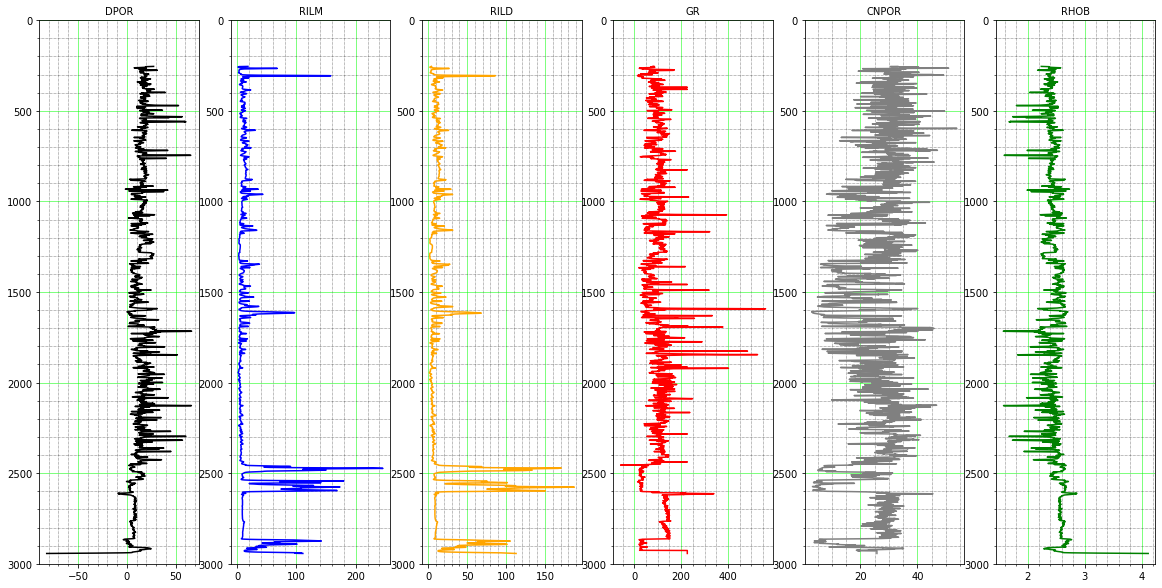

In [31]:
def well_log_display(df, column_depth, column_list, 
                     column_semilog=None, min_depth=None, max_depth=None, 
                     column_min=None, column_max=None, colors=None, 
                     fm_tops=None, fm_depths=None, 
                     tight_layout=1, title_size=10):
  """
  Display log side-by-side style
  Input:
  df is your dataframe
  specify min_depth and max_depth as the upper and lower depth limit
  column_depth is the column name of your depth
  column_list is the LIST of column names that you will display
  column_semilog is specific for resistivity column; if your resistivities are 
    in column 3, specify as: column_semilog=2. Default is None, so if you don't 
    specify, the resistivity will be plotted in normal axis instead
    
  column_min is list of minimum values for the x-axes.
  column_max is list of maximum values for the x-axes.
  
  colors is the list of colors specified for each log names. Default is None,
    so if don't specify, the colors will be Matplotlib default (blue)
  fm_tops and fm_depths are the list of formation top names and depths.
    Default is None, so no tops are shown. Specify both lists, if you want
    to show the tops
  """
  import numpy as np
  import matplotlib.pyplot as plt
  import pandas as pd
  import random

  if column_semilog==None:
    # column semilog not defined, RT will be plotted in normal axis
    logs = column_list

    # create the subplots; ncols equals the number of logs
    fig, ax = plt.subplots(nrows=1, ncols=len(logs), figsize=(20,10))

    # looping each log to display in the subplots
    if colors==None:
      # color is None (default)
      for i in range(len(logs)):
        # normal axis plot
        ax[i].plot(df[logs[i]], df[column_depth])
        ax[i].set_title(logs[i], size=title_size)
        ax[i].minorticks_on()
        ax[i].grid(which='major', linestyle='-', linewidth='0.5', color='lime')
        ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
        if column_min!=None and column_max!=None:
          # x-axis limits defined
          ax[i].set_xlim(column_min[i], column_max[i])
        if min_depth!=None and max_depth!=None:
          # y-axis limit defined
          ax[i].set_ylim(min_depth, max_depth)          
        ax[i].invert_yaxis()    

    else:
      # colors are defined (as list)
      for i in range(len(logs)):
        # normal axis plot
        ax[i].plot(df[logs[i]], df[column_depth], color=colors[i])
        ax[i].set_title(logs[i], size=title_size)
        ax[i].minorticks_on()
        ax[i].grid(which='major', linestyle='-', linewidth='0.5', color='lime')
        ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')        
        if column_min!=None and column_max!=None:
          # x-axis limits defined
          ax[i].set_xlim(column_min[i], column_max[i])       
        if min_depth!=None and max_depth!=None:
          # y-axis limit defined
          ax[i].set_ylim(min_depth, max_depth)           
        ax[i].invert_yaxis()    


  else:
    # column semilog is defined, RT will be plotted in semilog axis
    logs = column_list

    # create the subplots; ncols equals the number of logs
    fig, ax = plt.subplots(nrows=1, ncols=len(logs), figsize=(20,10))

    # looping each log to display in the subplots
    if colors==None:
      # color is None (default)
      for i in range(len(logs)):
        if i == column_semilog:
          # for resistivity, semilog plot
          ax[i].semilogx(df[logs[i]], df[column_depth])
        else:
          # for non-resistivity, normal plot
          ax[i].plot(df[logs[i]], df[column_depth])
        
        ax[i].set_title(logs[i], size=title_size)
        ax[i].minorticks_on()
        ax[i].grid(which='major', linestyle='-', linewidth='0.5', color='lime')
        ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')        
        if column_min!=None and column_max!=None:
          # x-axis limits defined
          ax[i].set_xlim(column_min[i], column_max[i])        
        if min_depth!=None and max_depth!=None:
          # y-axis limit defined
          ax[i].set_ylim(min_depth, max_depth)          
        ax[i].invert_yaxis()    

    else:
      # colors are defined (as list)
      for i in range(len(logs)):
        if i == column_semilog:
          # for resistivity, semilog plot
          ax[i].semilogx(df[logs[i]], df[column_depth], color=colors[i])     
        else:
          # for non-resistivity, normal plot
          ax[i].plot(df[logs[i]], df[column_depth], color=colors[i])
        
        ax[i].set_title(logs[i], size=title_size)
        ax[i].minorticks_on()
        ax[i].grid(which='major', linestyle='-', linewidth='0.5', color='lime')
        ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')  
        if column_min!=None and column_max!=None:
          # x-axis limits defined
          ax[i].set_xlim(column_min[i], column_max[i])   
        if min_depth!=None and max_depth!=None:
          # y-axis limit defined
          ax[i].set_ylim(min_depth, max_depth)
        ax[i].invert_yaxis() 

  if fm_tops!=None and fm_depths!=None:
    # Formation tops and depths are specified, they will be shown

    # produce colors
    rgb = []
    for j in range(len(fm_tops)):
      _ = (random.random(), random.random(), random.random())
      rgb.append(_)

    for i in range(len(logs)):
      for j in range(len(fm_tops)):
        # rgb = (random.random(), random.random(), random.random())
        ax[i].axhline(y=fm_depths[j], linestyle=":", c=rgb[j], label=fm_tops[j])  
        # y = fm_depths[j] / (max_depth - min_depth)    
        # ax[i].text(0.5, y, fm_tops[j], fontsize=5, va='center', ha='center', backgroundcolor='w')

  # plt.legend()
  # plt.legend(loc='upper center', bbox_to_anchor=(-3, -0.05),
  #            fancybox=True, shadow=True, ncol=5)  
  
  plt.show() 


column_depth = 'DEPT'
column_list = ['DPOR', 'RILM', 'RILD', 'GR', 'CNPOR', 'RHOB']
column_semilog = 6
column_min=None
column_max=None
min_depth= 0
max_depth= 3000
colors=["black","blue", "orange", "red","grey","green","yellow"]
well_log_display(df2, column_depth, column_list, column_semilog, min_depth, max_depth, column_min, column_max, colors)

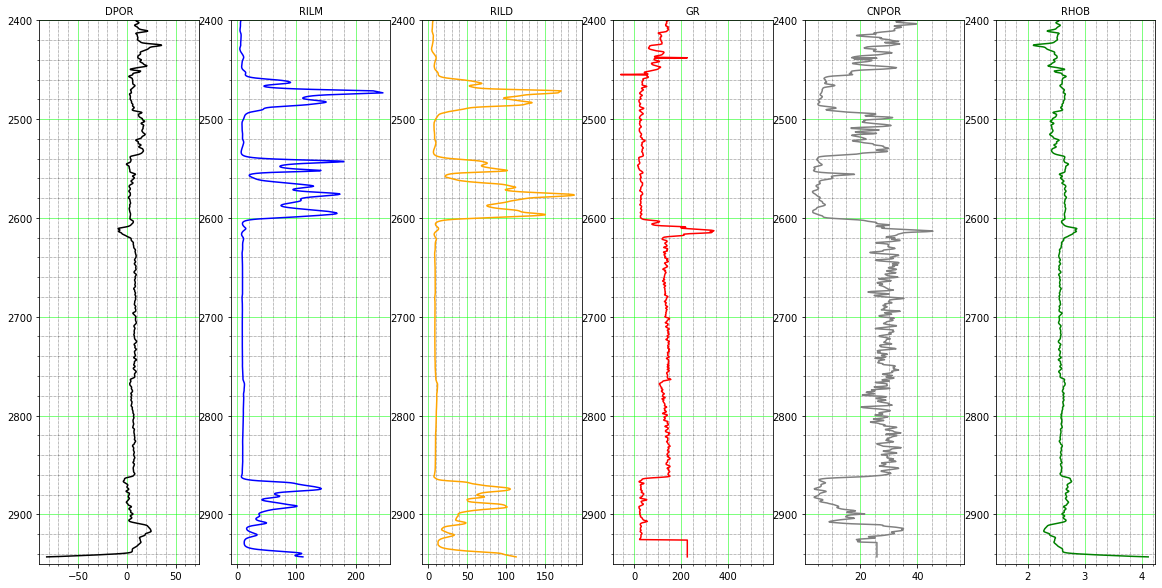

In [32]:
column_depth = 'DEPT'
column_list = ['DPOR', 'RILM', 'RILD', 'GR', 'CNPOR', 'RHOB']
column_semilog = 6
column_min=None
column_max=None
min_depth= 2400
max_depth= 2950
colors=["black","blue", "orange", "red","grey","green","yellow"]
well_log_display(df2, column_depth, column_list, column_semilog, min_depth, max_depth, column_min, column_max, colors)

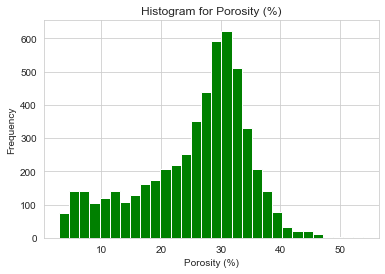

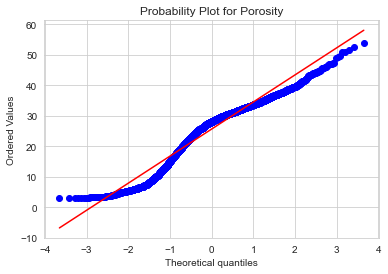

In [217]:
import scipy.stats as stats

plt.hist(df2['CNPOR'],30,color='green')
plt.ylabel('Frequency')
plt.xlabel('Porosity (%)')
plt.title('Histogram for Porosity (%)')
plt.show()

stats.probplot(df2['CNPOR'], dist="norm", plot=plt)
plt.title('Probability Plot for Porosity')
plt.show()

In [33]:
def triple_combo(df, column_depth, column_GR, column_resistivity, 
                 column_NPHI, column_RHOB, min_depth, max_depth, 
                 min_GR=0, max_GR=150, sand_GR_line=60,
                 min_resistivity=1, max_resistivity=1000, 
                 color_GR='black', color_resistivity='green', 
                 color_RHOB='red', color_NPHI='blue',
                 figsize=(6,10), tight_layout=1, 
                 title_size=15, title_height=1.05):
  """
  Producing Triple Combo log
  Input:
  df is your dataframe
  column_depth, column_GR, column_resistivity, column_NPHI, column_RHOB
  are column names that appear in your dataframe (originally from the LAS file)
  specify your depth limits; min_depth and max_depth
  input variables other than above are default. You can specify
  the values yourselves. 
  Output:
  Fill colors; gold (sand), lime green (non-sand), blue (water-zone), orange (HC-zone)
  """
  
  import matplotlib.pyplot as plt
  from matplotlib.ticker import AutoMinorLocator  
  import numpy as np

  fig, ax=plt.subplots(1,3,figsize=(8,10))
  fig.suptitle('Triple Combo Log', size=title_size, y=title_height)

  ax[0].minorticks_on()
  ax[0].grid(which='major', linestyle='-', linewidth='0.5', color='lime')
  ax[0].grid(which='minor', linestyle=':', linewidth='1', color='black')

  ax[1].minorticks_on()
  ax[1].grid(which='major', linestyle='-', linewidth='0.5', color='lime')
  ax[1].grid(which='minor', linestyle=':', linewidth='1', color='black')

  ax[2].minorticks_on()
  ax[2].grid(which='major', linestyle='-', linewidth='0.5', color='lime')
  ax[2].grid(which='minor', linestyle=':', linewidth='1', color='black')  

  # First track: GR
  ax[0].get_xaxis().set_visible(False)
  ax[0].invert_yaxis()   

  gr=ax[0].twiny()
  gr.set_xlim(min_GR,max_GR)
  gr.set_xlabel('GR',color=color_GR)
  gr.set_ylim(max_depth, min_depth)
  gr.spines['top'].set_position(('outward',10))
  gr.tick_params(axis='x',colors=color_GR)
  gr.plot(df[column_GR], df[column_depth], color=color_GR)  

  gr.minorticks_on()
  gr.xaxis.grid(which='major', linestyle='-', linewidth='0.5', color='lime')
  gr.xaxis.grid(which='minor', linestyle=':', linewidth='1', color='black') 

  gr.fill_betweenx(df[column_depth], sand_GR_line, df[column_GR], where=(sand_GR_line>=df[column_GR]), color = 'gold', linewidth=0) # sand
  gr.fill_betweenx(df[column_depth], sand_GR_line, df[column_GR], where=(sand_GR_line<df[column_GR]), color = 'lime', linewidth=0) # shale

  # Second track: Resistivity
  ax[1].get_xaxis().set_visible(False)
  ax[1].invert_yaxis()   

  res=ax[1].twiny()
  res.set_xlim(min_resistivity,max_resistivity)
  res.set_xlabel('Resistivity',color=color_resistivity)
  res.set_ylim(max_depth, min_depth)
  res.spines['top'].set_position(('outward',10))
  res.tick_params(axis='x',colors=color_resistivity)
  res.semilogx(df[column_resistivity], df[column_depth], color=color_resistivity)    

  res.minorticks_on()
  res.xaxis.grid(which='major', linestyle='-', linewidth='0.5', color='lime')
  res.xaxis.grid(which='minor', linestyle=':', linewidth='1', color='black')   

  # Third track: NPHI and RHOB
  ax[2].get_xaxis().set_visible(False)
  ax[2].invert_yaxis()  

  ## NPHI curve 
  nphi=ax[2].twiny()
  nphi.set_xlim(0,35)
  nphi.invert_xaxis()
  nphi.set_xlabel('NPHI',color='blue')
  nphi.set_ylim(max_depth, min_depth)
  nphi.spines['top'].set_position(('outward',10))
  nphi.tick_params(axis='x',colors='blue')
  nphi.plot(df[column_NPHI], df[column_depth], color=color_NPHI)

  nphi.minorticks_on()
  nphi.xaxis.grid(which='major', linestyle='-', linewidth='0.5', color='lime')
  nphi.xaxis.grid(which='minor', linestyle=':', linewidth='1', color='black')     

  ## RHOB curve 
  rhob=ax[2].twiny()
  rhob.set_xlim(2,3.5)
  rhob.set_xlabel('RHOB',color='red')
  rhob.set_ylim(max_depth, min_depth)
  rhob.spines['top'].set_position(('outward',50))
  rhob.tick_params(axis='x',colors='red')
  rhob.plot(df[column_RHOB], df[column_depth], color=color_RHOB)

  # solution to produce fill between can be found here:
  # https://stackoverflow.com/questions/57766457/how-to-plot-fill-betweenx-to-fill-the-area-between-y1-and-y2-with-different-scal
  x2p, _ = (rhob.transData + nphi.transData.inverted()).transform(np.c_[df[column_RHOB], df[column_depth]]).T
  nphi.autoscale(False)
  nphi.fill_betweenx(df[column_depth], df[column_NPHI], x2p, color="orange", alpha=0.4, where=(x2p > df[column_NPHI])) # hydrocarbon
  nphi.fill_betweenx(df[column_depth], df[column_NPHI], x2p, color="blue", alpha=0.4, where=(x2p < df[column_NPHI])) # water

  res.minorticks_on()
  res.grid(which='major', linestyle='-', linewidth='0.5', color='lime')
  res.grid(which='minor', linestyle=':', linewidth='1', color='black')
    
  plt.show()

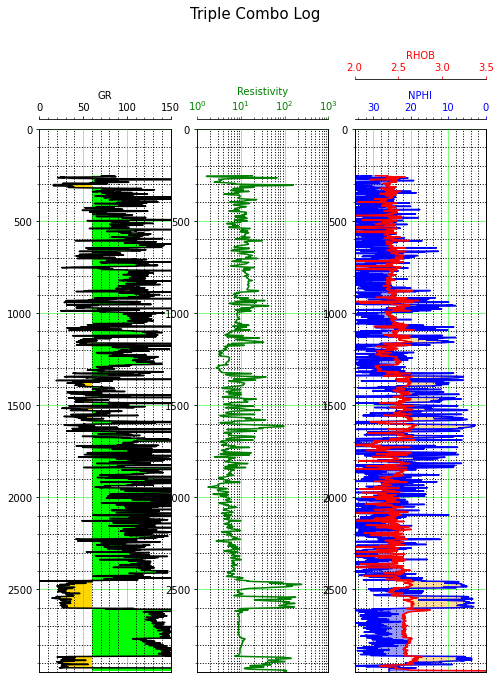

In [55]:
column_depth = 'DEPT'
column_GR = 'GR'
column_resistivity = 'RILM'
column_NPHI = 'CNPOR'
column_RHOB  = 'RHOB'
min_depth= 0
max_depth= 2950
triple_combo(df2, column_depth, column_GR, column_resistivity, column_NPHI, column_RHOB, min_depth, max_depth)

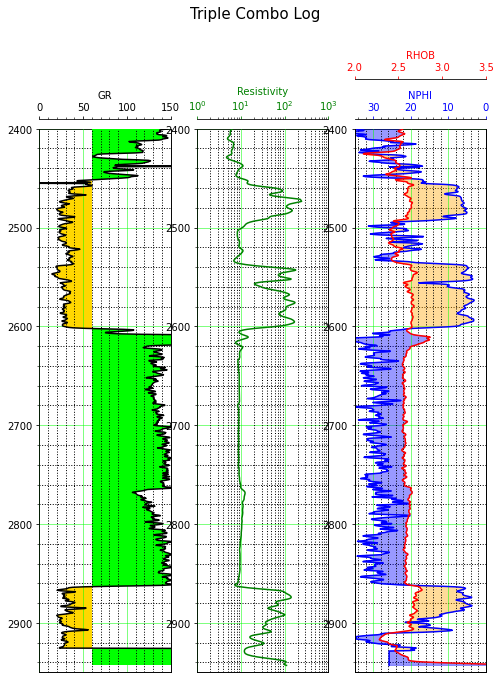

In [54]:
column_depth = 'DEPT'
column_GR = 'GR'
column_resistivity = 'RILM'
column_NPHI = 'CNPOR'
column_RHOB  = 'RHOB'
min_depth= 2400
max_depth= 2950
triple_combo(df2, column_depth, column_GR, column_resistivity, column_NPHI, column_RHOB, min_depth, max_depth)

In [89]:
# Determining the v-shale cutoff
#logi = df2["GR"] <= 60
#df2.loc[logi,df2['CNPOR'] <= 15,"GR"]
#logi=df2.loc[(df['GR'] <= 60) & (df['CNPOR'] <= 15),'GR']
logi=(df2['GR'] <= 50) & (df2['DEPT'] >= 2400)
v = np.sum(logi)
x = df2['DEPT'].to_numpy()
d = abs(x[0] - x[1])
ds = d*v
print('The total reservoir thickness was found to be ',ds,'ft or',round(ds*0.3048,2), 'meters.')
print('Vshale cutoff can be seen at 2450 ft and 2860 ft')

The total reservoir thickness was found to be  202.5 ft or 61.72 meters.
Vshale cutoff can be seen at 2450 ft and 2860 ft


In [88]:
# Determining the Net-to-Gross
hc = (df2['RILM'] >= 15) & (df2['DEPT'] >= 2400)
df2.loc[hc,'DEPT']
ntp = np.sum(hc)
a = df2['DEPT'].to_numpy()
b = abs(x[0] - x[1])
cd = b*ntp
ntg = cd/ds

logi2=(df2['GR'] <= 50) & (df2['CNPOR'] <= 16) & (df2['RILM']>=15) & (df2['DEPT'] >= 2400)
v2 = np.sum(logi2)

hcs = d*v2

#print('The Net-to-Gross value was found to be ',round(ntg*100,2), '%')
print('The hydrocarbon to clean reservoir value was found to be ',round(((hcs/ds)*100),2), '%')
print('The Net-to-Gross value was found to be ',round((ds/(2950-2400))*100,2), '%')

The hydrocarbon to clean reservoir value was found to be  64.69 %
The Net-to-Gross value was found to be  36.82 %


<AxesSubplot:>

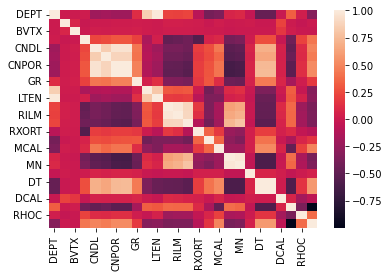

In [44]:
import seaborn as sns
sns.heatmap(df2.corr())

# Third File

In [183]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [184]:
im = Image.open('berea8bit.tif')

In [185]:
im.show()

In [186]:
imarray = np.array(im)

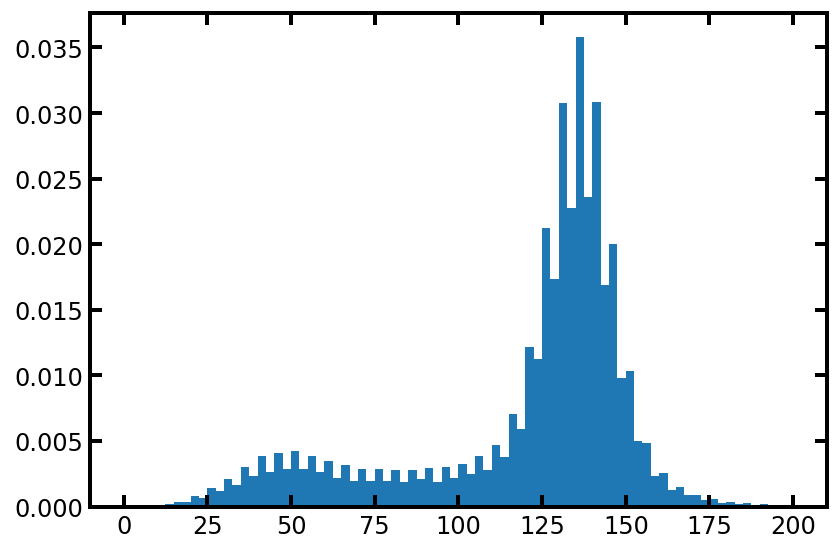

In [187]:
imV = imarray.reshape((500*500, 1))

from matplotlib import pyplot as plt
plt.hist(imV, density=True, bins=80, range=[0,200]) 
plt.show()


/var/folders/ft/183mwk990dn1mjtxvn7m58w80000gn/T/ipykernel_78100/1515601386.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  BW2 = BW.astype(np.bool)


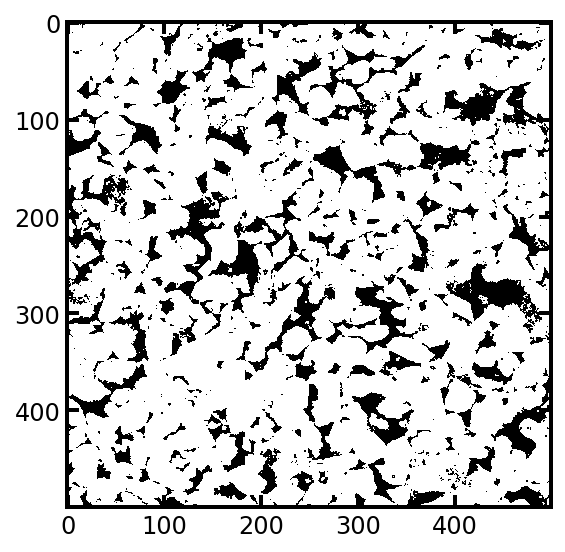

In [188]:
BW = imarray
BW[BW<100] = 0
BW[BW>=100] = 200
BW2 = BW.astype(np.bool)
BW2 = np.array(BW2)
plt.imshow(imarray, cmap='Greys_r')
#import cv2
#non local mean

In [189]:
x1 = np.size(BW2)
framework = np.sum(BW2)
por = ((x1-framework)/x1)*100
print('The porosity was found to be ',round(por,2),'%')

The porosity was found to be  20.22 %


In [190]:
import numpy as np
import porespy as ps
import scipy.ndimage as spim
import matplotlib.pyplot as plt
ps.visualization.set_mpl_style()

In [213]:
imarray2 = np.invert(imarray)


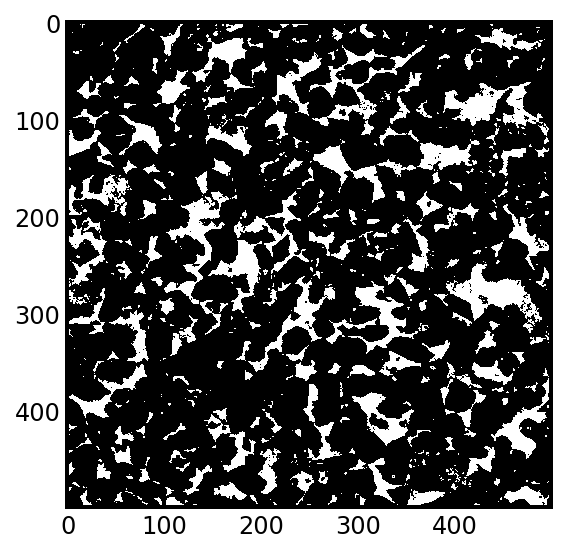

In [216]:
plt.imshow(imarray2, cmap='Greys_r')

  0%|          | 0/25 [00:00<?, ?it/s]

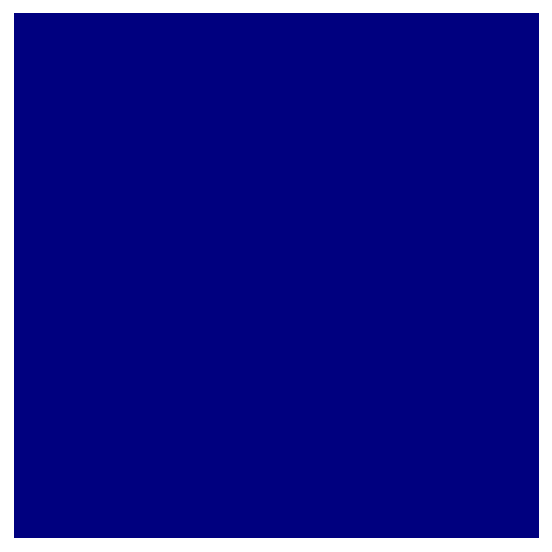

In [230]:
im = imarray2.reshape((500, 500))
thk = ps.filters.local_thickness(im, mode='dt')
fig, ax = plt.subplots()
ax.imshow(thk, interpolation='none', origin='lower', cmap=plt.cm.jet)
ax.axis(False);

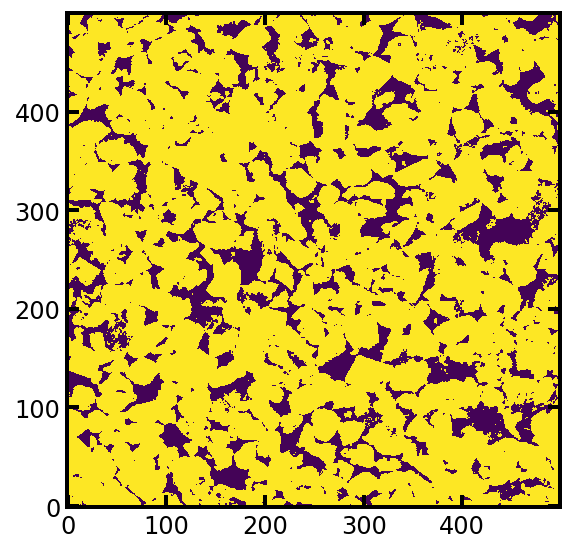

In [218]:
R = 10
strel = ps.tools.ps_disk(R)
im_temp = spim.binary_opening(im, structure=strel)
fig, ax = plt.subplots()
ax.imshow(im_temp*2.0 + ~im, interpolation='none', origin='lower');

In [195]:
im_result = im_temp*R

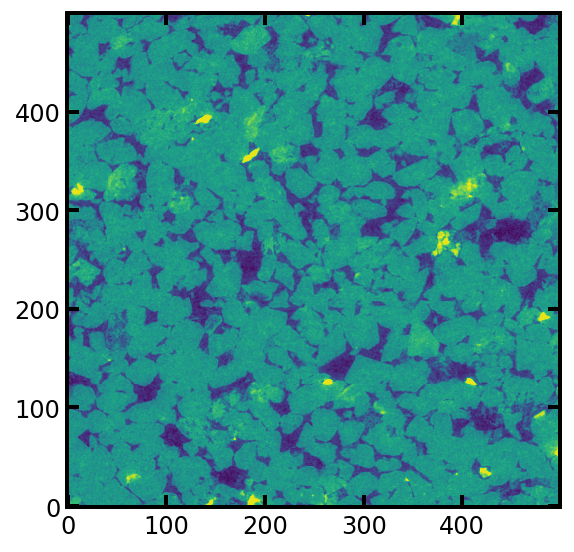

In [206]:
R = 9
strel = ps.tools.ps_disk(R)
im_temp = spim.binary_opening(im, structure=strel)

im_result[(im_result == 0)*im_temp] = R

fig, ax = plt.subplots()
ax.imshow(im_result + ~im, interpolation='none', origin='lower');

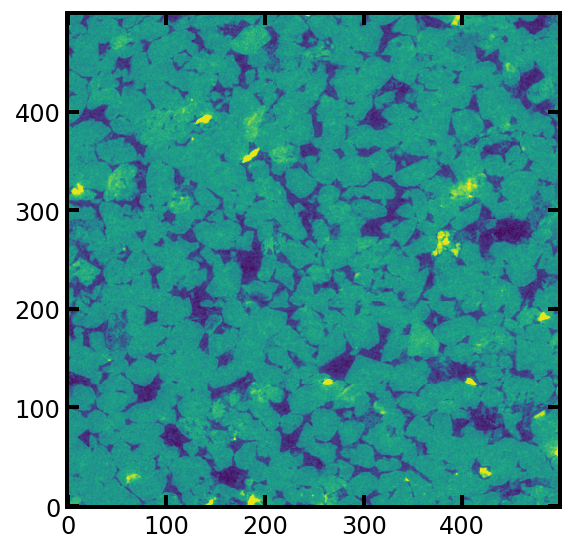

In [197]:
R = 8
strel = ps.tools.ps_disk(R)
im_temp = spim.binary_opening(im, structure=strel)

im_result[(im_result == 0)*im_temp] = R

fig, ax = plt.subplots()
ax.imshow(im_result + ~im, interpolation='none', origin='lower');

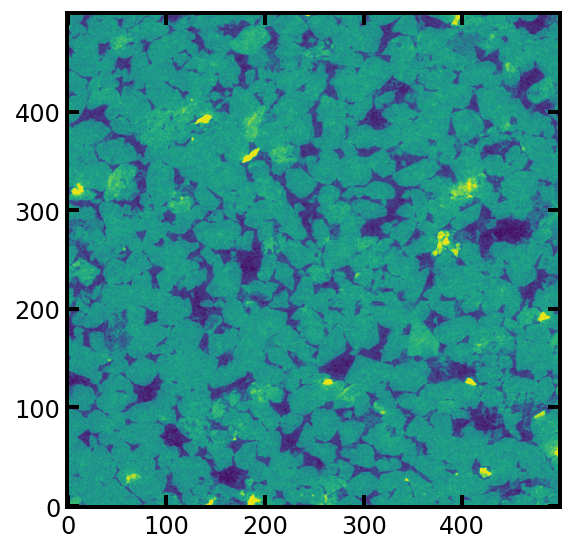

In [198]:
R = 7
strel = ps.tools.ps_disk(R)
im_temp = spim.binary_opening(im, structure=strel)

im_result[(im_result == 0)*im_temp] = R

fig, ax = plt.subplots()
ax.imshow(im_result + ~im, interpolation='none', origin='lower');

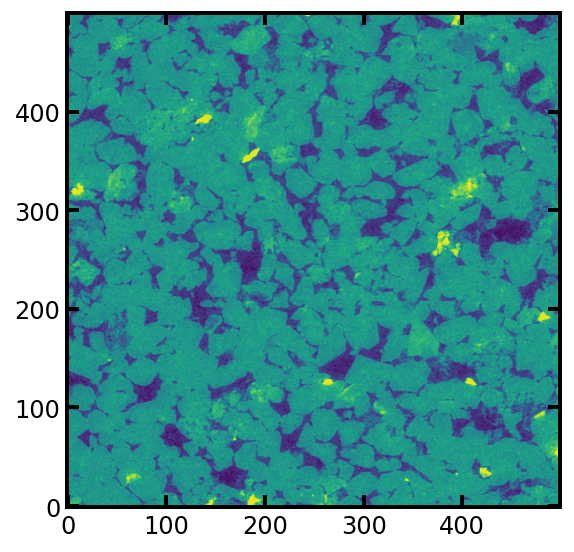

In [199]:
R = 6
strel = ps.tools.ps_disk(R)
im_temp = spim.binary_opening(im, structure=strel)

im_result[(im_result == 0)*im_temp] = R

fig, ax = plt.subplots()
ax.imshow(im_result + ~im, interpolation='none', origin='lower');

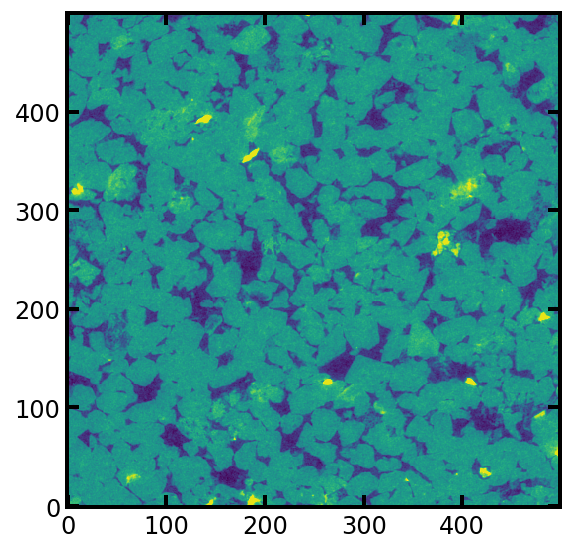

In [200]:
R = 5
strel = ps.tools.ps_disk(R)
im_temp = spim.binary_opening(im, structure=strel)

im_result[(im_result == 0)*im_temp] = R

fig, ax = plt.subplots()
ax.imshow(im_result + ~im, interpolation='none', origin='lower');

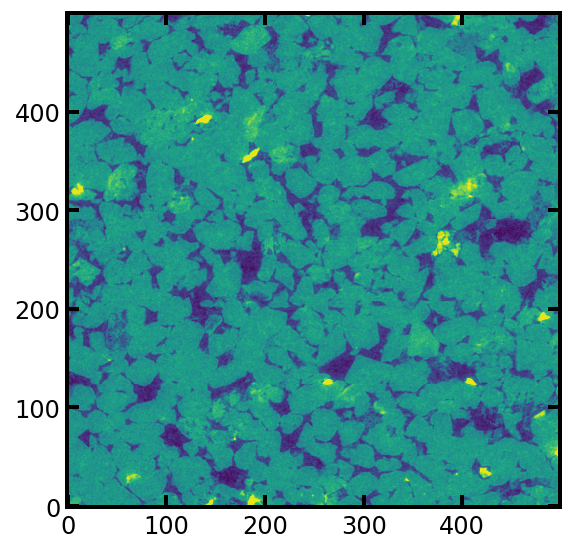

In [201]:
R = 4
strel = ps.tools.ps_disk(R)
im_temp = spim.binary_opening(im, structure=strel)

im_result[(im_result == 0)*im_temp] = R

fig, ax = plt.subplots()
ax.imshow(im_result + ~im, interpolation='none', origin='lower');

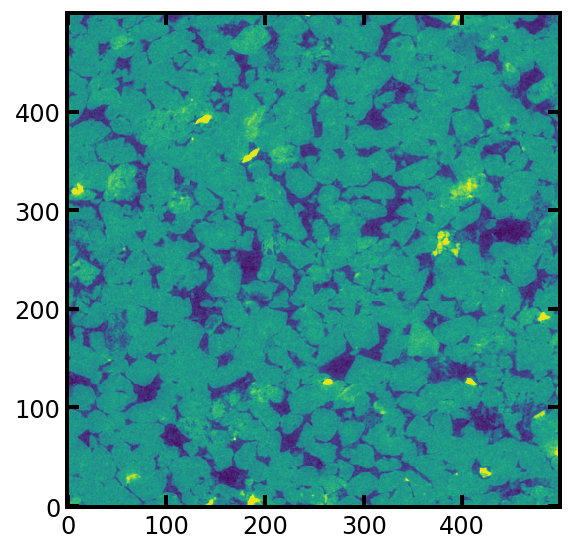

In [202]:
R = 3
strel = ps.tools.ps_disk(R)
im_temp = spim.binary_opening(im, structure=strel)

im_result[(im_result == 0)*im_temp] = R

fig, ax = plt.subplots()
ax.imshow(im_result + ~im, interpolation='none', origin='lower');

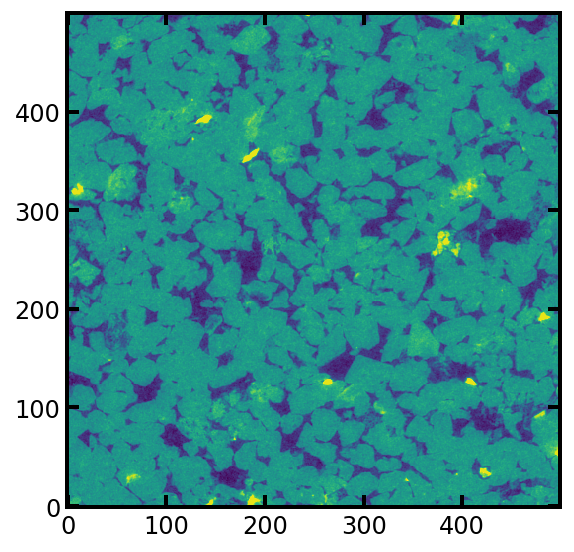

In [203]:
R = 2
strel = ps.tools.ps_disk(R)
im_temp = spim.binary_opening(im, structure=strel)

im_result[(im_result == 0)*im_temp] = R

fig, ax = plt.subplots()
ax.imshow(im_result + ~im, interpolation='none', origin='lower');

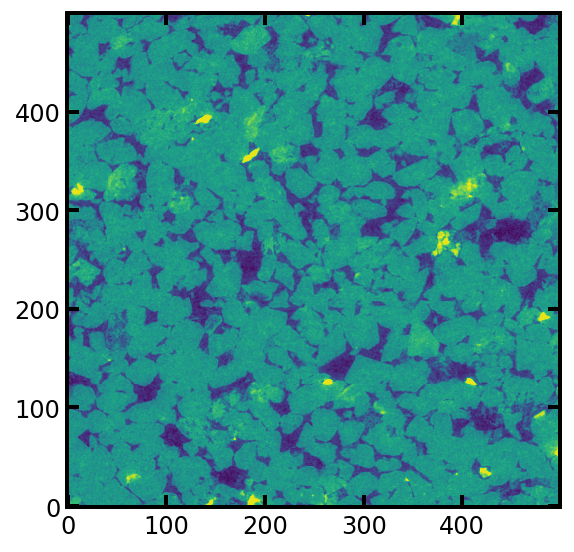

In [204]:
R = 1
strel = ps.tools.ps_disk(R)
im_temp = spim.binary_opening(im, structure=strel)

im_result[(im_result == 0)*im_temp] = R

fig, ax = plt.subplots()
ax.imshow(im_result + ~im, interpolation='none', origin='lower');